In [42]:
#importing the necessary packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import pickle


In [64]:
#converting csv to df
df=pd.read_csv('C:\\Users\\devli\\copper\\Copper_Set.xlsx - Result 1.csv',low_memory=False)

In [67]:
#getting an idea about the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [68]:
#checking null values
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [69]:
#since material_ref is missing many values dropping them would remove lot of valuable data
#in that case using fillna to replace the null values is logical
df['material_ref'].fillna('nil', inplace=True)

In [70]:
#fixing the format of the data 
df['item_date'] = df['item_date'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d', errors='coerce').date())

# Convert columns to numeric
numeric_columns = ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'selling_price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Strip leading zeros from 'material_ref'
df['material_ref'] = df['material_ref'].str.lstrip('0')

# Convert 'delivery date' to datetime and extract date
df['delivery date'] = df['delivery date'].apply(lambda x: pd.to_datetime(x, format='%Y%m%d', errors='coerce').date())

In [71]:
#checking for skew and outliers in the data 
#creating a numeric data frame with numeric columns

ndf = df.select_dtypes(include=['int64', 'float64'])


In [72]:
ndf.skew()

quantity tons    424.689648
customer          86.985069
country            0.753595
application        0.724359
thickness        303.446799
width              0.374597
product_ref        1.015216
selling_price    301.387258
dtype: float64

7
4
0


C:\Users\devli\AppData\Local\Temp\ipykernel_15344\2194135036.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])


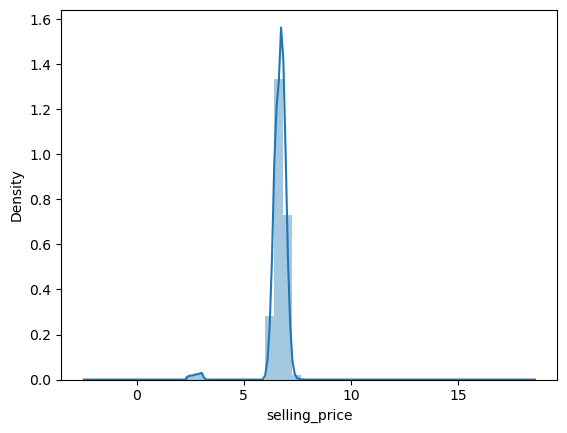

C:\Users\devli\AppData\Local\Temp\ipykernel_15344\2194135036.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quantity tons'])


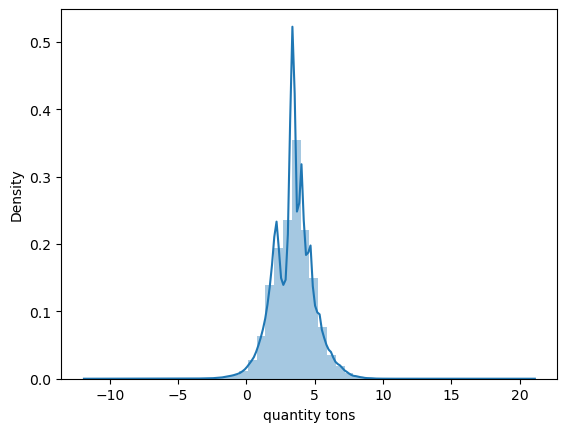

C:\Users\devli\AppData\Local\Temp\ipykernel_15344\2194135036.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thickness'])


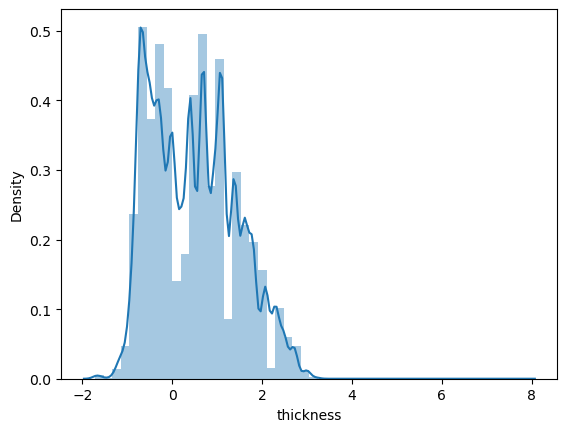

In [73]:
#since we have established the skew we can correct the skew and visualize it

mask1 = df['selling_price'] <= 0
print(mask1.sum())
df.loc[mask1, 'selling_price'] = np.nan

mask1 = df['quantity tons'] <= 0
print(mask1.sum())
df.loc[mask1, 'quantity tons'] = np.nan

mask1 = df['thickness'] <= 0
print(mask1.sum())

import numpy as np
df['selling_price'] = np.log(df['selling_price'])
sns.distplot(df['selling_price'])
plt.show()

df['quantity tons'] = np.log(df['quantity tons'])
sns.distplot(df['quantity tons'])
plt.show()

df['thickness'] = np.log(df['thickness'])
sns.distplot(df['thickness'])
plt.show()

In [75]:
#the missing values in the below columns are filled with mean since dropping them created imbalance 
df['selling_price'].fillna(df['selling_price'].mean(), inplace=True)
df['quantity tons'].fillna(df['quantity tons'].mean(), inplace=True)
df['thickness'].fillna(df['thickness'].mean(), inplace=True)


In [76]:
df.isna().sum()

id                2
item_date         3
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         0
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     0
dtype: int64

In [89]:
#dropping nan values
df.dropna()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,3.991779,30156308.0,28.0,Won,W,10.0,0.693147,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,6.643822,30202938.0,25.0,Won,W,41.0,-0.223144,1210.0,104991,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,5.956169,30153963.0,30.0,Won,WI,28.0,-0.967584,952.0,S0380700,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,5.310301,30349574.0,32.0,Won,S,59.0,0.832909,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,6.666354,30211560.0,28.0,Won,W,10.0,1.386294,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.357842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,4.629691,30200854.0,25.0,Won,W,41.0,-0.040822,1220.0,1000777,164141591,2020-07-01,6.381816
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,5.337954,30200854.0,25.0,Won,W,41.0,-0.051293,1500.0,1000227,164141591,2020-07-01,6.378426
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,1.443523,30200854.0,25.0,Won,W,41.0,-0.342490,1250.0,1004216,164141591,2020-07-01,6.428105
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,3.392110,30200854.0,25.0,Won,W,41.0,-0.162519,1250.0,1001149,164141591,2020-07-01,6.398595


In [78]:
#building a prediction model
y=df['selling_price']
x=df[['quantity tons','status','item type','application','thickness','width','country','customer','product_ref']]
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(x[['item type']])
x_ohe = ohe.fit_transform(x[['item type']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(x[['status']])
x_be = ohe2.fit_transform(x[['status']]).toarray()
x = np.concatenate((x[['quantity tons', 'application', 'thickness', 'width','country','customer','product_ref']].values, x_ohe, x_be), axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

In [107]:
#checking error and accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.036197073108735565
R-squared: 0.8837998076139224


In [109]:
#checking the model
new_sample = np.array([[np.log(40), 10, np.log(250), 0, 28,30202938,1670798778,'PL','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = dtr.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [721.88055257]


c:\Users\devli\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\devli\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [111]:
#saving the model making it easier to export
with open('model.pkl', 'wb') as file:
    pickle.dump(dtr, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [118]:
dfc = df[df['status'].isin(['Won', 'Lost'])]

In [123]:
#building a classification model
Y=dfc['status']
X= dfc[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)

X = np.concatenate((X[['quantity tons', 'selling_price','application', 'thickness', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)



Accuracy: 0.9094715852442672
Confusion Matrix:
[[ 5584  1369]
 [ 1355 21782]]


In [ ]:
#checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[ 5584  1369]
 [ 1355 21782]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      6953
           1       0.94      0.94      0.94     23137

    accuracy                           0.91     30090
   macro avg       0.87      0.87      0.87     30090
weighted avg       0.91      0.91      0.91     30090



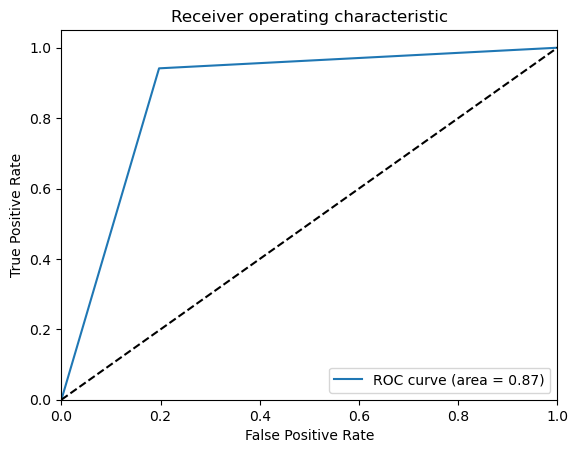

In [124]:
#printing confusion matrix and visualizing it
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [126]:
#checking the model with input
new_sample = np.array([[np.log(700), np.log(999), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


c:\Users\devli\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [127]:
# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)